In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns

In [2]:
df = pd.read_csv("../input/crime.csv")

In [3]:
df

,State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [4]:
df.columns

Index(['State', 'Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

In [5]:
df["Murder"] = df.Murder/df.UrbanPop
df["Assault"] = df.Assault/df.UrbanPop
df["Rape"] = df.Rape/df.UrbanPop

In [6]:
df.drop(columns = "UrbanPop",inplace = True)

In [7]:
x = df.iloc[:,1:]

In [8]:
scaler = StandardScaler()

In [9]:
scaler.fit(x)

StandardScaler()

In [10]:
x_norm = scaler.transform(x)

In [11]:
x_norm = scaler.fit_transform(x)

In [12]:
kmeans = KMeans(n_clusters=2) 

In [13]:
kmeans.fit(x_norm)

C:\Users\sebas\anaconda3\envs\Web\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=2)

In [14]:
kmeans.cluster_centers_

array([[ 1.28783832,  1.25505083,  0.98375644],
       [-0.50082601, -0.48807532, -0.38257195]])

In [15]:
kmeans.n_iter_

2

In [16]:
kmeans.inertia_

68.3050057077592

In [17]:
inertias= []
k = np.arange(2,21)
for n in k:
    kmeans = KMeans(n_clusters=n)
    kmeans.fit(x_norm)
    inertias.append(kmeans.inertia_)

C:\Users\sebas\anaconda3\envs\Web\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sebas\anaconda3\envs\Web\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sebas\anaconda3\envs\Web\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sebas\anaconda3\envs\Web\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is k

In [18]:
inertias

[69.44495747417665,
 48.013757885626035,
 38.88600686401703,
 24.672137069772944,
 19.747417306876766,
 17.080250747949318,
 16.608159284029732,
 13.599455120138304,
 11.659141346851152,
 10.28871012876769,
 10.00349955661647,
 7.970272547767543,
 7.718675532130228,
 6.897501818609975,
 6.947310867515578,
 5.765523264065756,
 5.053627043018892,
 4.98642338839352,
 4.2739949981673195]

In [19]:
dfine = pd.DataFrame({"k":k,"inercia":inertias})

In [20]:
dfine

,k,inercia
0,2,69.444957
1,3,48.013758
2,4,38.886007
3,5,24.672137
4,6,19.747417
5,7,17.080251
6,8,16.608159
7,9,13.599455
8,10,11.659141
9,11,10.288710


<Axes: xlabel='k', ylabel='inercia'>

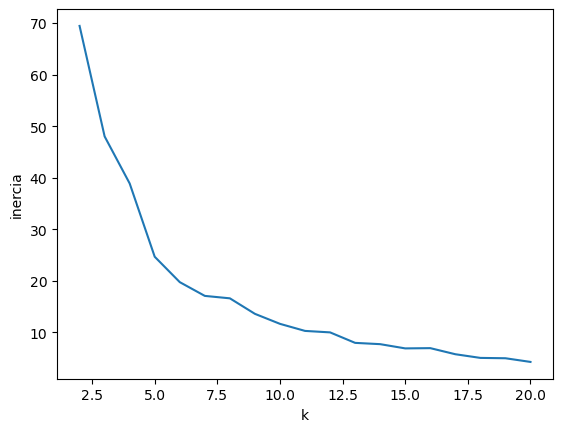

In [21]:
sns.lineplot(data = dfine, x = "k", y = "inercia")

In [22]:
inertias2= []
k2 = np.arange(2,21)
for n in k2:
    kmeans = KMeans(n_clusters=n)
    kmeans.fit(x_norm)
    inertias2.append(kmeans.inertia_)

C:\Users\sebas\anaconda3\envs\Web\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sebas\anaconda3\envs\Web\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sebas\anaconda3\envs\Web\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sebas\anaconda3\envs\Web\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is k

In [23]:
dfine2 = pd.DataFrame({"k":k,"inercia":inertias})

<Axes: xlabel='k', ylabel='inercia'>

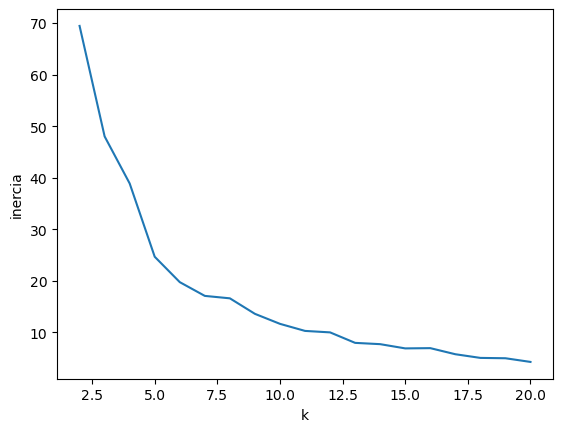

In [24]:
sns.lineplot(data = dfine2, x = "k", y = "inercia")

In [25]:
kmeans = KMeans(n_clusters=6)
kmeans.fit(x)

C:\Users\sebas\anaconda3\envs\Web\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=6)

In [26]:
kmeans.cluster_centers_

array([[0.13069181, 2.77158246, 0.39147983],
       [0.29141414, 5.7260101 , 0.59482323],
       [0.08173616, 1.80861334, 0.25514459],
       [0.17976414, 3.83214015, 0.38753964],
       [0.28888889, 7.48888889, 0.35777778],
       [0.03973946, 0.91186614, 0.1944275 ]])

In [27]:
df.shape

(50, 4)

In [28]:
kmeans.labels_

array([3, 1, 3, 3, 0, 0, 2, 3, 3, 3, 5, 2, 0, 2, 5, 2, 2, 3, 2, 3, 2, 3,
       5, 1, 0, 2, 2, 0, 5, 2, 3, 0, 4, 5, 2, 2, 0, 2, 2, 1, 2, 0, 0, 2,
       2, 0, 2, 2, 5, 0])

In [29]:
df["label"] = kmeans.labels_

In [30]:
df.loc[df.label==3,:]

,State,Murder,Assault,Rape,label
0,Alabama,0.227586,4.068966,0.365517,3
2,Arizona,0.101250,3.675000,0.387500,3
3,Arkansas,0.176000,3.800000,0.390000,3
7,Delaware,0.081944,3.305556,0.219444,3
8,Florida,0.192500,4.187500,0.398750,3
9,Georgia,0.290000,3.516667,0.430000,3
17,Louisiana,0.233333,3.772727,0.336364,3
19,Maryland,0.168657,4.477612,0.414925,3
21,Michigan,0.163514,3.445946,0.474324,3
30,New Mexico,0.162857,4.071429,0.458571,3


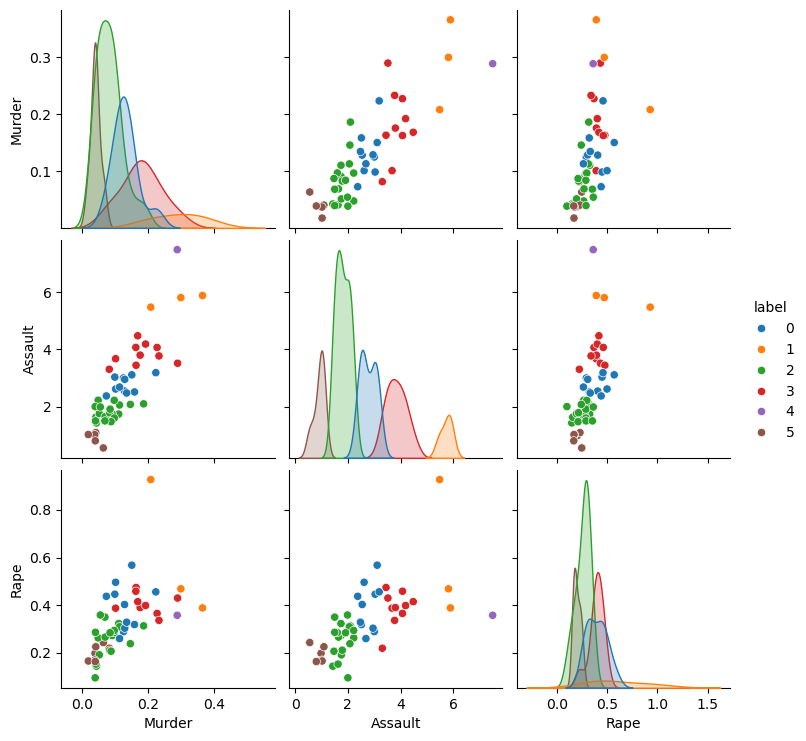

In [31]:
sns.pairplot(data = df,hue="label", palette="tab10")